
1. Description of the Problem
Melbourne is Australia's best city for international students and attract many students from all over the world. 

According to the data published by Victorian Government , in 2019, Melbourne welcomed over 220000 international students. 

One of the big concerns for international students when moving to a new city would be finding an accommodation. Student halls are the most reliable means of housing for students, but it is not easy to secure a place in one as they are in high demand. Therefore in this project, I intend to explore different neighborhoods of Melbourne and find the best area to build a new student apartment for intenational student to solve this persistent problem and to find a new business opportunity.This research is expected to benefit real-estate investors looking for a profitable location or international students looking for a place to live in Melbourne 

From the student perspective, a lot of factors come into play when finding the best accommodation, including location and rent. Howerver, this study will focus only on the safety and the general atmosphere of the neighborhood. Distance to universities are also an important factor in choosing a student apartment. 

2. Data Acquisition and Preprocessing
In this project, I will be using the following datasets to help solve my problem - Melbourne Recorded Crime by location, List of Melbourne Boroughs, and Foursquare API.
Let's have a look at them.

a.Melbourne Recorded Crime by location

Melbourne Recorded Crime by location from 2010 to 2019
source: Crime statistics Agency 
url:https://www.crimestatistics.vic.gov.au/sites/default/files/embridge_cache/emshare/original/public/users/202003/7e/f18e69c3e/Data_Tables_LGA_Criminal_Incidents_Year_Ending_December_2019.xlsx



In [9]:
import pandas as pd
import numpy as np

In [33]:

body = client_09ef9c5b0d134d13ac079466c0c126a0.get_object(Bucket='capstoneprojectthebattleofneighbo-donotdelete-pr-zsd8h5zpta34ho',Key='Data_Tables_LGA_Criminal_Incidents_Year_Ending_December_2019.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_09ef9c5b0d134d13ac079466c0c126a0 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='glVL__qPH-FQ1nJZy6KTh0nsWNifyMyxWRo2w_78zWRI',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_09ef9c5b0d134d13ac079466c0c126a0.get_object(Bucket='capstoneprojectthebattleofneighbo-donotdelete-pr-zsd8h5zpta34ho',Key='Data_Tables_LGA_Criminal_Incidents_Year_Ending_December_2019.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

crime = pd.read_csv(body)
crime.head(21)

,Year,Year ending,Police Region,Local Government Area,Incidents Recorded,"Rate per 100,000 population"
0,2019,December,1 North West Metro,Banyule,7072,5381.4
1,2019,December,1 North West Metro,Brimbank,15178,7219.6
2,2019,December,1 North West Metro,Darebin,11442,6972.0
3,2019,December,1 North West Metro,Hobsons Bay,5002,5124.7
4,2019,December,1 North West Metro,Hume,15929,6836.8
5,2019,December,1 North West Metro,Maribyrnong,6917,7343.5
6,2019,December,1 North West Metro,Melbourne,27046,14930.6
7,2019,December,1 North West Metro,Melton,9103,5530.0
8,2019,December,1 North West Metro,Moonee Valley,6491,4986.8
9,2019,December,1 North West Metro,Moreland,10873,5851.9


In [34]:
crime.shape

(79, 6)

In [35]:
crime['Local Government Area'].unique()

array([' Banyule', ' Brimbank', ' Darebin', ' Hobsons Bay', ' Hume',
       ' Maribyrnong', ' Melbourne', ' Melton', ' Moonee Valley',
       ' Moreland', ' Nillumbik', ' Whittlesea', ' Wyndham', ' Yarra',
       ' Alpine', ' Bass Coast', ' Baw Baw', ' Benalla', ' Boroondara',
       ' East Gippsland', ' Greater Shepparton', ' Indigo', ' Knox',
       ' Latrobe', ' Manningham', ' Mansfield', ' Maroondah', ' Mitchell',
       ' Moira', ' Monash', ' Murrindindi', ' South Gippsland',
       ' Strathbogie', ' Towong', ' Wangaratta', ' Wellington',
       ' Whitehorse', ' Wodonga', ' Yarra Ranges', ' Bayside',
       ' Cardinia', ' Casey', ' Frankston', ' Glen Eira',
       ' Greater Dandenong', ' Kingston', ' Mornington Peninsula',
       ' Port Phillip', ' Stonnington', ' Ararat', ' Ballarat', ' Buloke',
       ' Campaspe', ' Central Goldfields', ' Colac-Otway', ' Corangamite',
       ' Gannawarra', ' Glenelg', ' Golden Plains', ' Greater Bendigo',
       ' Greater Geelong', ' Hepburn', '

In [36]:
crime1=crime.drop(['Police Region','Year','Year ending','Rate per 100,000 population'],axis=1)
crime1.head()



,Local Government Area,Incidents Recorded
0,Banyule,7072
1,Brimbank,15178
2,Darebin,11442
3,Hobsons Bay,5002
4,Hume,15929


 b. List of Melbourne Local Government Area

Information on Melbourne Local Government Area and their population & coordinates
-Population can be used to calcuate the ratio of reported crime to population for better comparison.
-Coordinates can be used to get neighborhood data from Foursquare.
source: Wikipedia
url=https://en.wikipedia.org/wiki/Local_government_areas_of_Victoria#Greater_Melbourne

In [4]:
import requests
import lxml
from bs4 import BeautifulSoup 

In [103]:
 
body = client_09ef9c5b0d134d13ac079466c0c126a0.get_object(Bucket='capstoneprojectthebattleofneighbo-donotdelete-pr-zsd8h5zpta34ho',Key='Local government area in Melbourne.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

area = pd.read_csv(body)
area.head()
 
 

,Local Government Area,Population,Latitude,Longitude
0,Melbourne,169961,-37.81,144.96
1,Port Phillip,113200,-37.85,144.97
2,Stonnington,116207,-37.86,145.03
3,Yarra,98521,-37.80,144.99
4,Banyule,130237,-37.73,145.08


Foursquare API

List of top 50 popular places in the neighborhood
source: Foursquare
url: https://api.foursquare.com

In [105]:
area['Local Government Area'].unique()

array(['Melbourne', 'Port Phillip', ' Stonnington', ' Yarra', ' Banyule',
       ' Bayside', ' Boroondara', ' Darebin', ' Glen Eira',
       ' Hobsons Bay', ' Kingston', ' Manningham', ' Maribyrnong',
       ' Monash', ' Moonee Valley', ' Moreland', ' Whitehorse',
       ' Brimbank', 'Shire of Cardinia', ' Casey', ' Frankston',
       ' Greater Dandenong', ' Hume', ' Knox', ' Maroondah', ' Melton',
       'Shire of Mornington Peninsula', 'Shire of Nillumbik',
       ' Whittlesea', ' Wyndham', 'Shire of Yarra Ranges'], dtype=object)

In [106]:
import numpy as np  
import pandas as pd  

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json  

from geopy.geocoders import Nominatim 
GeoLocator = Nominatim(user_agent='My-IBMNotebook') 
import requests 
from pandas.io.json import json_normalize 

 
import matplotlib.cm as cm
import matplotlib.colors as colors

 
from sklearn.cluster import KMeans


In [81]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
     
CLIENT_ID = 'KPE35VTYZBKOWWABEB4JOL0VW4LHGZPZI4PD21UZT2IVCDPR'  
CLIENT_SECRET = 'FXVAHCW3WFLGT51UQLMQ151HMB00FFSXRKVEIRPJOG3LBCSV'  
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: KPE35VTYZBKOWWABEB4JOL0VW4LHGZPZI4PD21UZT2IVCDPR
CLIENT_SECRET:FXVAHCW3WFLGT51UQLMQ151HMB00FFSXRKVEIRPJOG3LBCSV


In [107]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
    url = 'https://api.foursquare.com/v2/venues/explore?&CLIENT_ID={}&CLIENT_SECRET={}&v={}&ll={},{}&radius={}&LIMIT={}'.format(CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius,
            LIMIT)
    results = requests.get(url).json()["response"]['groups'],['0']['items']
        
        # return only relevant information for each nearby venue
    venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Local government area', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

    
   
     


In [108]:
LIMIT=50 
venues = getNearbyVenues(names=area['Local Government Area'],
                                   latitudes=area['Latitude'],
                                   longitudes=area['Longitude']
                                  )
                                

Melbourne
Port Phillip
 Stonnington
 Yarra
 Banyule
 Bayside
 Boroondara
 Darebin
 Glen Eira
 Hobsons Bay
 Kingston
 Manningham
 Maribyrnong
 Monash
 Moonee Valley
 Moreland
 Whitehorse
 Brimbank
Shire of Cardinia
 Casey
 Frankston
 Greater Dandenong
 Hume
 Knox
 Maroondah
 Melton
Shire of Mornington Peninsula
Shire of Nillumbik
 Whittlesea
 Wyndham
Shire of Yarra Ranges


KeyError: 'groups'

In [109]:
 venues.head()


NameError: name 'venues' is not defined

In [110]:
import matplotlib.pyplot as plt
crime1.head()

,Local Government Area,Incidents Recorded
0,Banyule,7072
1,Brimbank,15178
2,Darebin,11442
3,Hobsons Bay,5002
4,Hume,15929


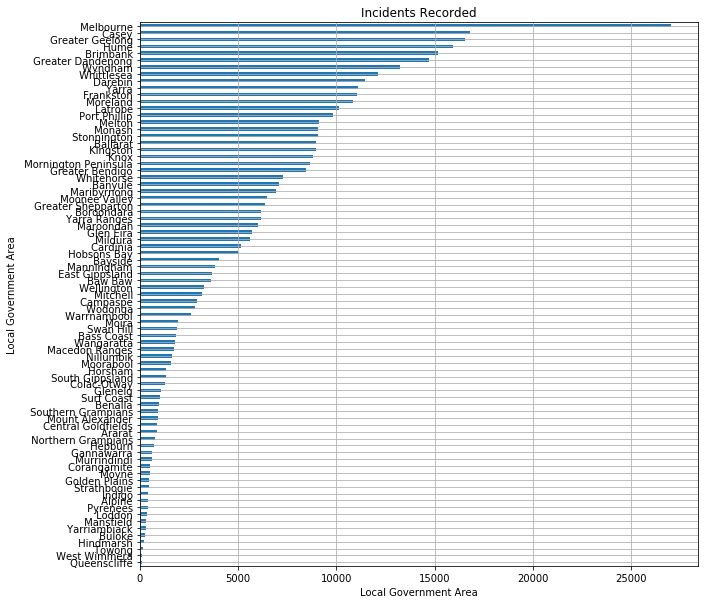

In [111]:
crime1.set_index('Local Government Area')['Incidents Recorded'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.xlabel('Local Government Area')
plt.title('Incidents Recorded')
plt.show()

In [112]:

#Combine crime data and borough information data
df = pd.merge(crime1,area, how='outer', on='Local Government Area')
df.head()

,Local Government Area,Incidents Recorded,Population,Latitude,Longitude
0,Banyule,7072.0,130237.0,-37.73,145.08
1,Brimbank,15178.0,208714.0,-37.76,144.81
2,Darebin,11442.0,161609.0,-37.73,145.02
3,Hobsons Bay,5002.0,96470.0,-37.84,144.84
4,Hume,15929.0,224394.0,-37.60,144.83


In [115]:
df['Population'].astype(float)
df['CrimeToPop'] = df['Incidents Recorded'] / df['Population'] * 1000
df.head()


,Local Government Area,Incidents Recorded,Population,Latitude,Longitude,CrimeToPop
0,Banyule,7072.0,130237.0,-37.73,145.08,54.301005
1,Brimbank,15178.0,208714.0,-37.76,144.81,72.721523
2,Darebin,11442.0,161609.0,-37.73,145.02,70.800512
3,Hobsons Bay,5002.0,96470.0,-37.84,144.84,51.850316
4,Hume,15929.0,224394.0,-37.60,144.83,70.986747


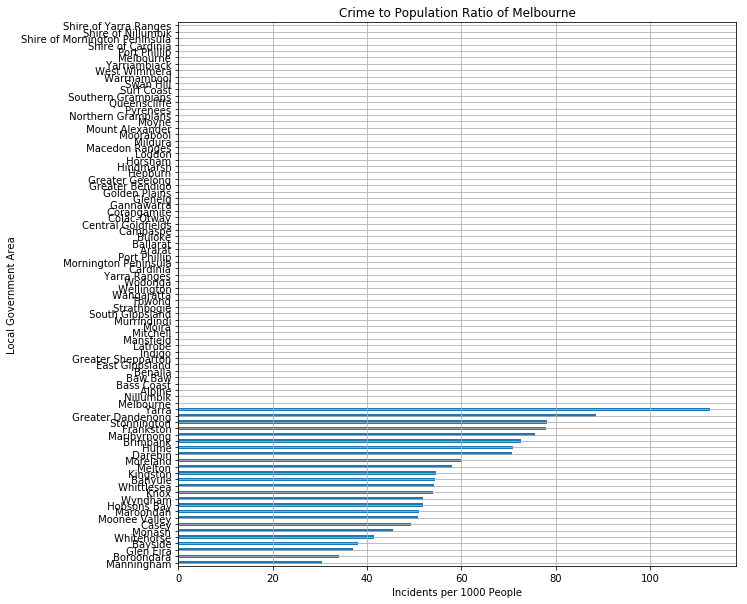

In [116]:
df.set_index('Local Government Area')['CrimeToPop'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.xlabel('Incidents per 1000 People')
plt.title('Crime to Population Ratio of Melbourne')
plt.show()

In [117]:
!conda install -c conda-forge folium=0.5.0 --yes  
import folium
from geopy.geocoders import Nominatim

Solving environment: done

# All requested packages already installed.



In [101]:
address = 'Greater Melbourne, Australia'

geolocator = Nominatim(user_agent="explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Greater Melbourne are {}, {}.'.format(latitude, longitude))
 

The geograpical coordinate of Greater Melbourne are -37.9504939, 145.36785627371626.


AttributeError: 'float' object has no attribute 'dtype'

In [102]:

map_melbourne = folium.Map(location=[latitude,longitude], zoom_start=11)
for lat, lng, LocalGovernmentArea in zip(df['Latitude'], df['Longitude'], df['Local Government Area']):
    label = '{}'.format(LocalGovernmentArea)
    label2 = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label2,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_melbourne)  
map_melbourne

ValueError: Location values cannot contain NaNs, got:
[nan, nan]

In [59]:
import numpy as np  
import pandas as pd  

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json  

from geopy.geocoders import Nominatim 
GeoLocator = Nominatim(user_agent='My-IBMNotebook') 
import requests 
from pandas.io.json import json_normalize 

 
import matplotlib.cm as cm
import matplotlib.colors as colors

 
from sklearn.cluster import KMeans



In [97]:
address = 'Greater Melbourne, Australia'

geolocator = Nominatim(user_agent="explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Greater Melbourne are {}, {}.'.format(latitude, longitude))



The geograpical coordinate of Greater Melbourne are -37.9504939, 145.36785627371626.


b. Cluster Analysis
In this part, we will conduct K-means clustering to group the boroughs according to what convenience facilities they have using Foursquare data.

In [66]:
print('There are {} uniques categories.'.format(len(venues['Venue Category'].unique())))

NameError: name 'venues' is not defined